### Import libraries

In [1]:
import numpy as np
from scipy import special as sp
import matplotlib.pyplot as plt
import utils

### Questions

##### 1. Let the power control be inactive. Assuming universal bandwidth reuse in all the sectors and cells (reuse factor 1), generate the CDF of SIR (in dB). Repeat assuming universal bandwidth reuse across cells, but different bandwidth in each sector (reuse factor 3). Repeat assuming bandwidth reuse factor 3 across cells and also 3 across sectors (total reuse factor 9). Plot the three CDFs together. If we want at least -5 dB of SIR per user, does any of the reuse factors achieve it with 97% probability?

### Reuse factor: $N_c$

$(u, v)$ --> Coordinates in the hexagonal system. (integer)

In [15]:
# Calcular R según D
D = 2                   # Distancia entre nucleos
R = D / np.sqrt(3)      # Radius 
print(f"R = {R:.4f}, D = {D:.4f}")

R = 1.1547, D = 2.0000


In [2]:
# Calcular D según R
R = 2                   # Radius
D = R * np.sqrt(3)      # Distancia entre nucleos 
print(f"R = {R:.4f}, D = {D:.4f}")

R = 2.0000, D = 3.4641


In [3]:
# Define hexagonal coordinates for two cells, placed vertically adjacent
hex_positions = [[0,0], [0,1], [1,1], [0,2], [1,0], [2,0], [-1, 1], [-1, -1], [1, -1], [0, -1], [0, -2], [1, -2], [2, -2], [2, -1], [-1, 0], [-1, 2], [-2, 0], [-2, 1], [-2, 2]]
hex_positions = [(utils.x_cartesian(c[0], c[1], D), utils.y_cartesian(c[0], c[1], D)) for c in hex_positions]

NameError: name 'D' is not defined

In [18]:
# Reuse factor 1 (all cells and sector have same Bw)
Nc1 = np.sort(utils.reuse_factor_1(hex_positions, R, D))
Nc1 = [10 * np.log10(SIR) for SIR in Nc1]
cdf_Nc1 = np.arange(1, len(Nc1) + 1) / len(Nc1)

# Reuse factor 3 (all cells have same Bw but different among sectors )
Nc3 = np.sort(utils.reuse_factor_3(hex_positions, R, D))
Nc3 = [10 * np.log10(SIR) for SIR in Nc3]
cdf_Nc3 = np.arange(1, len(Nc3) + 1) / len(Nc3)

# Reuse factor 9  (both cells and sector have different Bw)
Nc9 = np.sort(utils.reuse_factor_9(hex_positions, R, D))
Nc9 = [10 * np.log10(SIR) for SIR in Nc9]
cdf_Nc9 = np.arange(1, len(Nc9) + 1) / len(Nc9)

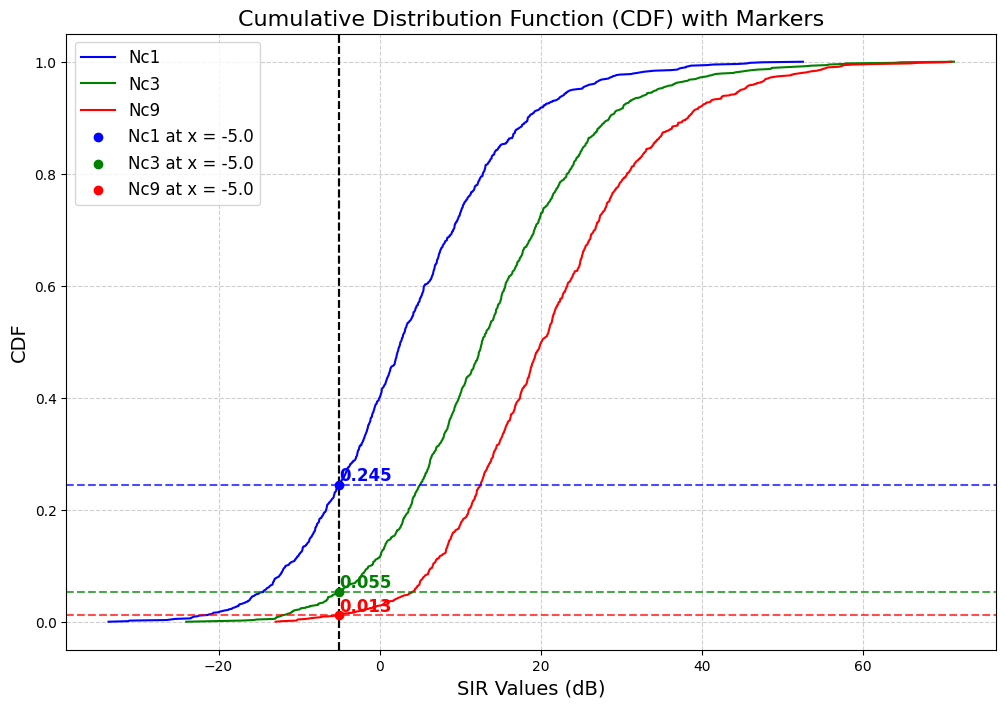

In [21]:
# Function to find the y-value at x = -5
def find_y_at_x(sorted_data, cdf, x):
    idx = np.searchsorted(sorted_data, x, side='left')  # Find where x would fit
    if idx < len(cdf) and sorted_data[idx] == x:
        return cdf[idx]
    elif idx == 0:  # If x is smaller than all data points
        return 0
    elif idx == len(cdf):  # If x is larger than all data points
        return 1
    else:  # Interpolate between points
        x0, x1 = sorted_data[idx - 1], sorted_data[idx]
        y0, y1 = cdf[idx - 1], cdf[idx]
        return y0 + (x - x0) * (y1 - y0) / (x1 - x0)

# Find the y-values for x = -5
x_mark = -5
y_Nc1 = find_y_at_x(Nc1, cdf_Nc1, x_mark)
y_Nc3 = find_y_at_x(Nc3, cdf_Nc3, x_mark)
y_Nc9 = find_y_at_x(Nc9, cdf_Nc9, x_mark)

# Plot the CDFs
plt.figure(figsize=(12, 8))
plt.plot(Nc1, cdf_Nc1, marker='o', linestyle='-', label='Nc1', color='blue', markersize=0)
plt.plot(Nc3, cdf_Nc3, marker='s', linestyle='-', label='Nc3', color='green', markersize=0)
plt.plot(Nc9, cdf_Nc9, marker='^', linestyle='-', label='Nc9', color='red', markersize=0)

# Mark the points where x = -5
for y, label, color in zip([y_Nc1, y_Nc3, y_Nc9], ['Nc1', 'Nc3', 'Nc9'], ['blue', 'green', 'red']):
    plt.axvline(x=x_mark, color='black', linestyle='--', alpha=0.7)  # Vertical line
    plt.axhline(y=y, color=color, linestyle='--', alpha=0.7)  # Horizontal line
    plt.scatter([x_mark], [y], color=color, label=f'{label} at x = {x_mark:.1f}', zorder=5)
    plt.text(x_mark, y, f'{y:.3f}', fontsize=12, color=color, ha='left', va='bottom', fontweight='bold')

# Plot customization
plt.title('Cumulative Distribution Function (CDF) with Markers', fontsize=16)
plt.xlabel('SIR Values (dB)', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

2. Activate the fractional power control. With reuse factor 3, what is the power control exponent that maximizes the percentage of users with SIR ³ -5 dB? Plot the CDF of SIR (in dB) with such power control exponent

In [2]:
# Calcular D según R
R = 2                   # Radius
D = R * np.sqrt(3)      # Distancia entre nucleos 
print(f"R = {R:.4f}, D = {D:.4f}")

# Define hexagonal coordinates for two cells, placed vertically adjacent
hex_positions = [[0,0], [0,1], [1,1], [0,2], [1,0], [2,0], [-1, 1], [-1, -1], [1, -1], [0, -1], [0, -2], [1, -2], [2, -2], [2, -1], [-1, 0], [-1, 2], [-2, 0], [-2, 1], [-2, 2]]
hex_positions = [(utils.x_cartesian(c[0], c[1], D), utils.y_cartesian(c[0], c[1], D)) for c in hex_positions]

R = 2.0000, D = 3.4641


Computing the range [0.4, 0.5], using steps of 0.01
Smallest y = 0.05, found at exponent 0.4


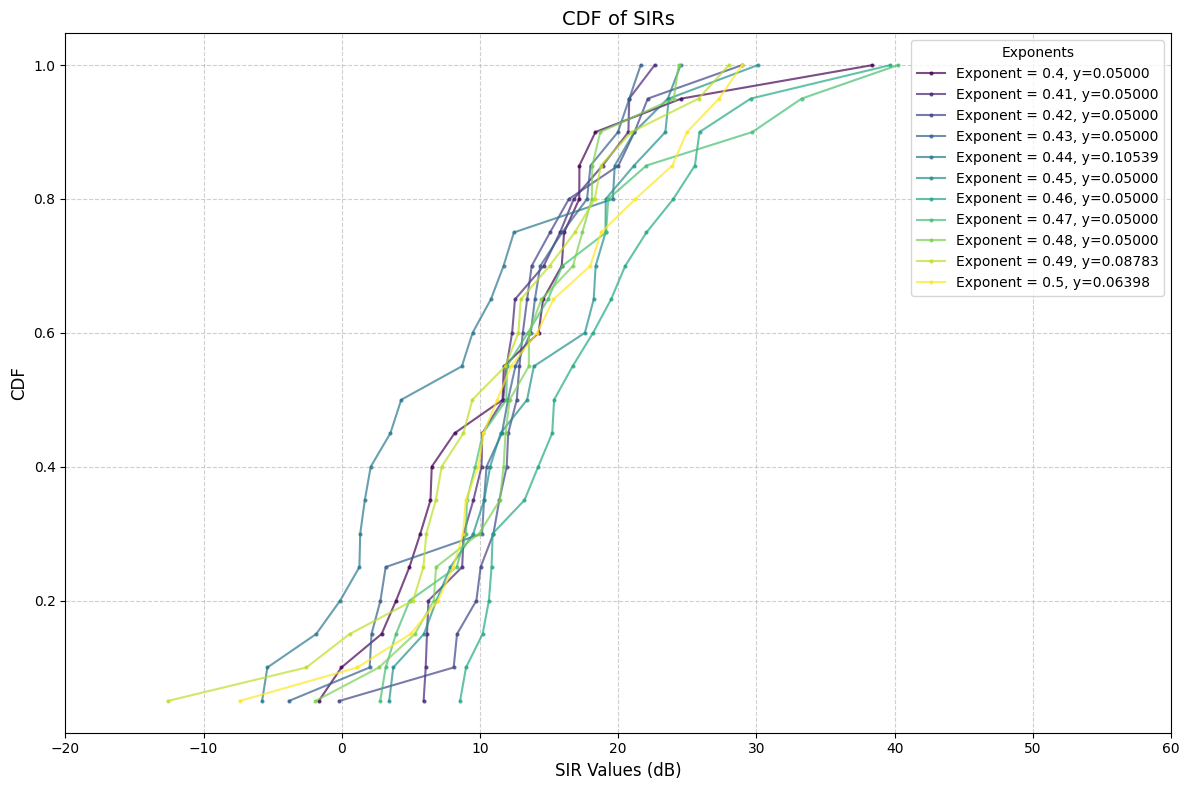

[[array([14.8858642]),
  array([4.38454363]),
  array([52.38558189]),
  array([286.4153739]),
  array([68.40551012]),
  array([1.94087039]),
  array([0.68205049]),
  array([26.53881713]),
  array([40.57773507]),
  array([14.56841343]),
  array([0.99471259]),
  array([4.47468198]),
  array([3.08644861]),
  array([28.60228037]),
  array([52.23614607]),
  array([6.54571375]),
  array([6893.95550596]),
  array([2.47190821]),
  array([3.701949]),
  array([39.0053228])],
 [array([10.39552819]),
  array([118.47276783]),
  array([120.10448744]),
  array([17.90350666]),
  array([10.25865828]),
  array([77.03302088]),
  array([8.95848587]),
  array([3.91047777]),
  array([47.66306729]),
  array([7.61188986]),
  array([28.87620412]),
  array([37.91782522]),
  array([17.07749056]),
  array([4.23932373]),
  array([14.70999569]),
  array([183.34025602]),
  array([4.04769162]),
  array([15.55199341]),
  array([7.43290977]),
  array([4.13628434])],
 [array([19.26850126]),
  array([10.10712728]),
  arr

In [3]:
utils.Q2(hex_positions, R, D, N = 500, exp_from=0.0, exp_to=1.0, N_steps=10)

3. Re-address question 2 for pathloss exponents u = 3 and u = 4.5. Plot the SIR (in dB) CDFs for u = 3, 3.8 and 4.5 together. Briefly discuss whether a small or a large exponent is preferable in interference-limited conditions. How can the system designer affect the exponent?

In [ ]:
# Mas cositas

4. Set the pathloss exponent back at u = 3.8, disable the power control, and let the bandwidth be 100 MHz. Suppose that a family of constellations and codes with an SNR gap to capacity of 4 dB is available, and that the error probability is negligible. Plot the CDF of the throughput achievable by users for the reuse factors 1, 3, and 9. Compute the average bit rate as well as the bit rate attained by 97% of users in each case. Remember to take into account that the available bandwidth at each sector depends on the reuse factor!

In [6]:
# Reuse factor 1 (all cells and sector have same Bw)
R1 = np.sort(utils.reuse_factor_1_throughput(hex_positions, R, D))
cdf_R1 = np.arange(1, len(R1) + 1) / len(R1)

# Reuse factor 3 (all cells have same Bw but different among sectors )
R3 = np.sort(utils.reuse_factor_3_throughput(hex_positions, R, D))
cdf_R3 = np.arange(1, len(R3) + 1) / len(R3)

# Reuse factor 9  (both cells and sector have different Bw)
R9 = np.sort(utils.reuse_factor_9_throughput(hex_positions, R, D))
cdf_R9 = np.arange(1, len(R9) + 1) / len(R9)

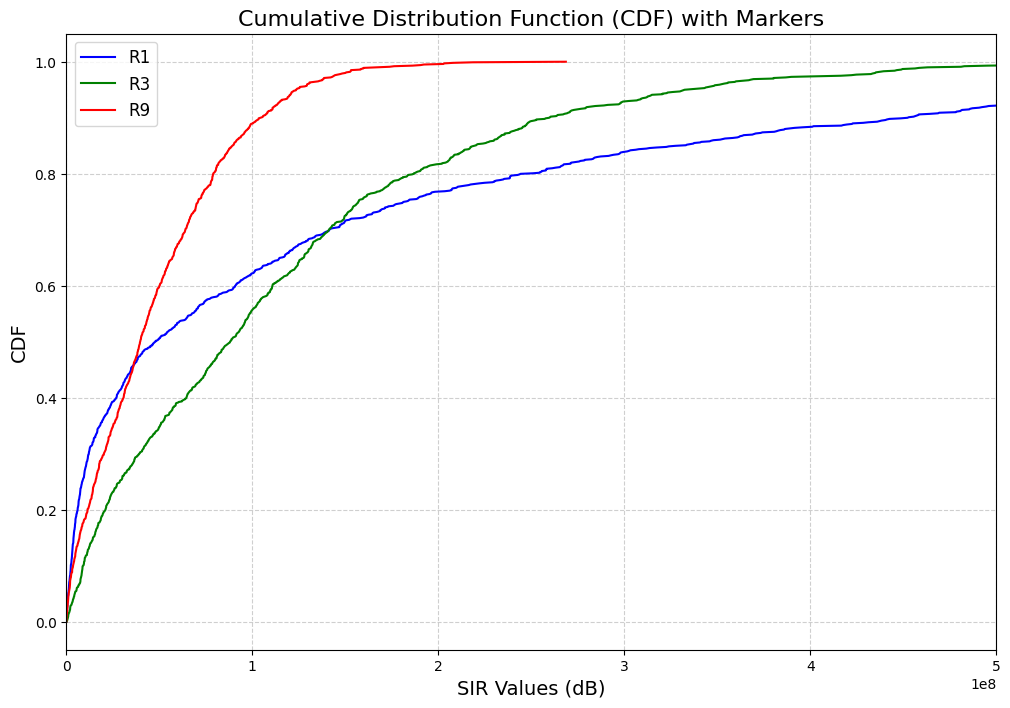

In [17]:
# Plot the CDFs
plt.figure(figsize=(12, 8))
plt.plot(R1, cdf_R1, marker='o', linestyle='-', label='R1', color='blue', markersize=0)
plt.plot(R3, cdf_R3, marker='s', linestyle='-', label='R3', color='green', markersize=0)
plt.plot(R9, cdf_R9, marker='^', linestyle='-', label='R9', color='red', markersize=0)

# Plot customization
plt.title('Cumulative Distribution Function (CDF) with Markers', fontsize=16)
plt.xlabel('SIR Values (dB)', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xlim(0,500000000)
plt.show()